In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
dataset= pd.read_csv('framingham.csv')

In [ ]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Pre-processing**

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(dataset.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dataset.shape

(3656, 16)

In [ ]:
dataset.mean()

male                 0.443654
age                 49.557440
education            1.979759
currentSmoker        0.489059
cigsPerDay           9.022155
BPMeds               0.030361
prevalentStroke      0.005744
prevalentHyp         0.311543
diabetes             0.027079
totChol            236.873085
sysBP              132.368025
diaBP               82.912062
BMI                 25.784185
heartRate           75.730580
glucose             81.856127
TenYearCHD           0.152352
dtype: float64

Removing outliers

<Axes: >

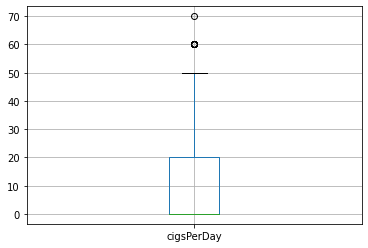

In [ ]:
dataset.boxplot(column='cigsPerDay')

In [ ]:
dataset.loc[dataset['cigsPerDay'] > 59, 'cigsPerDay'] = 9.02

<Axes: >

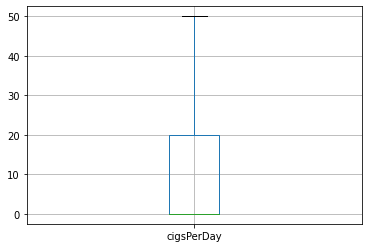

In [ ]:
dataset.boxplot(column='cigsPerDay') #after removing outliers

In [ ]:
dataset['totChol'].describe()

count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64

<Axes: >

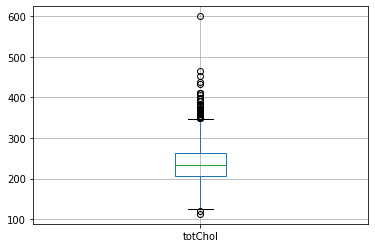

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset.loc[dataset['totChol'] > 480, 'totChol'] = 237

<Axes: >

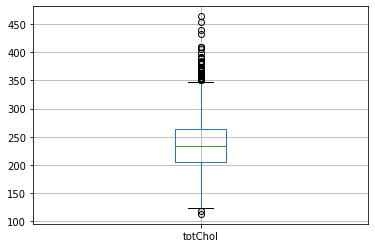

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset['sysBP'].describe()

count    3656.000000
mean      132.368025
std        22.092444
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

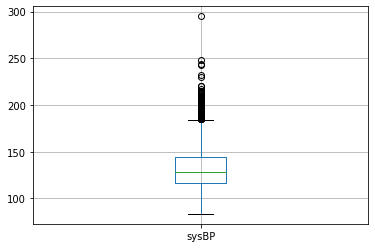

In [ ]:
dataset.boxplot(column='sysBP')

In [ ]:
dataset.loc[dataset['sysBP'] > 270, 'sysBP'] = dataset['sysBP'].median()

<Axes: >

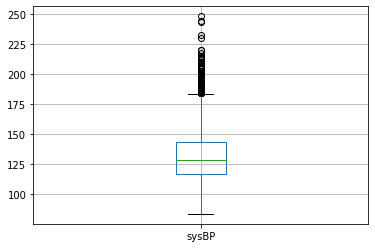

In [ ]:
dataset.boxplot(column='sysBP') #After removing the outliers

In [ ]:
dataset['BMI'].describe()

count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

<Axes: >

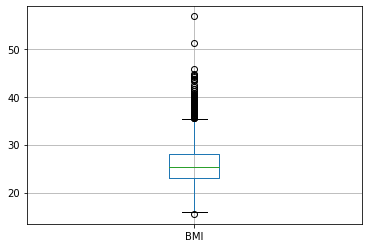

In [ ]:
dataset.boxplot(column='BMI')

In [ ]:
dataset.loc[dataset['BMI'] > 49, 'BMI'] = dataset['BMI'].median()

<Axes: >

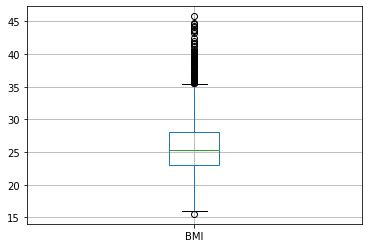

In [ ]:
dataset.boxplot(column='BMI') #After removing the outliers

In [ ]:
dataset['heartRate'].describe()

count    3656.000000
mean       75.730580
std        11.982952
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

<Axes: >

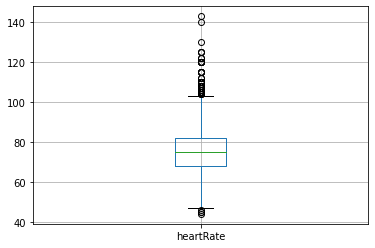

In [ ]:
dataset.boxplot(column='heartRate')

In [ ]:
dataset['glucose'].describe()

count    3656.000000
mean       81.856127
std        23.910128
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

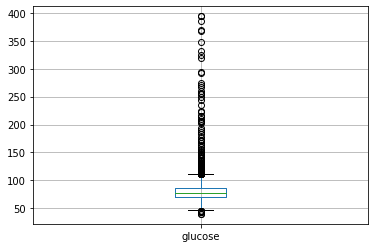

In [ ]:
dataset.boxplot(column='glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

**LASSO FEATURE SELECTION**

In [ ]:
X = dataset.drop("TenYearCHD", 1)       # feature matrix
y = dataset['TenYearCHD']               # target feature

<ipython-input-33-fd9490b3f6e6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop("TenYearCHD", 1)       # feature matrix


In [ ]:
features = X.columns
features

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2559, 15)
(1097, 15)
(2559,)
(1097,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR,Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [ ]:
# Apply the Lasso Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
coeff = lasso.coef_
coeff
# In Lasso regression, discarding a feature will make its coefficient equal to 0.

array([ 0.        ,  0.00626059, -0.        ,  0.        ,  0.00284251,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00010981,
        0.00262268,  0.        ,  0.        , -0.00055225,  0.00107174])

In [ ]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
13,heartRate,-0.000552
0,male,0.000000
2,education,-0.000000
3,currentSmoker,0.000000
5,BPMeds,0.000000
6,prevalentStroke,0.000000
7,prevalentHyp,0.000000
8,diabetes,0.000000
11,diaBP,0.000000
12,BMI,0.000000


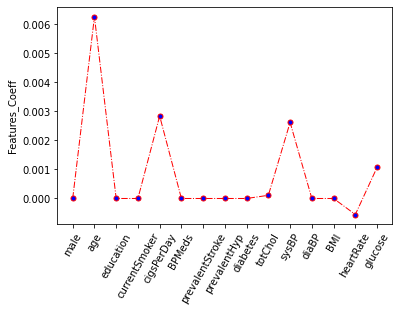

In [ ]:
# Plot the coeff with features
plt.plot(range(len(features)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o',
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<Axes: xlabel='features', ylabel='coeff'>

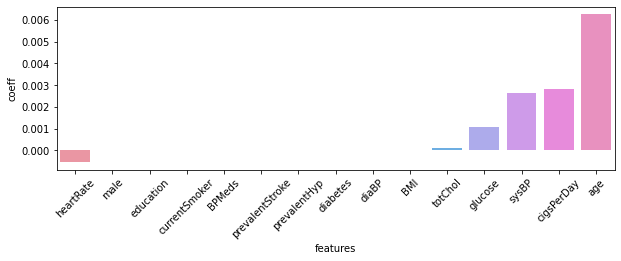

In [ ]:
# Bar chart to show coeff
df_coeff.set_index('coeff')
# sorting in ascending order for better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)

In [ ]:
data2=dataset[['totChol','glucose','cigsPerDay','sysBP','age','TenYearCHD']]
data2.head()

,totChol,glucose,cigsPerDay,sysBP,age,TenYearCHD
0,195.0,77.0,0.0,106.0,39,0
1,250.0,76.0,0.0,121.0,46,0
2,245.0,70.0,20.0,127.5,48,0
3,225.0,103.0,30.0,150.0,61,1
4,285.0,85.0,23.0,130.0,46,0


In [ ]:
Y2 = data2['TenYearCHD']
X2 = data2.drop(['TenYearCHD'], axis=1)

from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X2, Y2)

# Split the dataset into training and testing sets
train_x2, test_x2, train_y2, test_y2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x2 = scaler.fit_transform(train_x2)
test_x2 = scaler.transform(test_x2)

**LAZY PREDICT**

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(train_x2, test_x2, train_y2, test_y2)

100%|██████████| 29/29 [00:21<00:00,  1.37it/s]


In [ ]:
models # Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.90,0.90,0.90,0.90,2.55
LGBMClassifier,0.89,0.89,0.89,0.89,2.87
ExtraTreesClassifier,0.88,0.88,0.88,0.88,0.74
RandomForestClassifier,0.87,0.87,0.87,0.87,0.98
LabelPropagation,0.85,0.85,0.85,0.85,0.88
LabelSpreading,0.85,0.85,0.85,0.85,1.50
BaggingClassifier,0.83,0.83,0.83,0.83,0.21
KNeighborsClassifier,0.81,0.81,0.81,0.81,0.06
DecisionTreeClassifier,0.80,0.80,0.80,0.80,0.04


**1. Extra Trees classifier**

Accuracy: 0.8830645161290323
Precision: 0.8667687595712098
Recall: 0.907051282051282
F1-score: 0.8864526233359437
Confusion Matrix: 
 [[529  87]
 [ 58 566]]


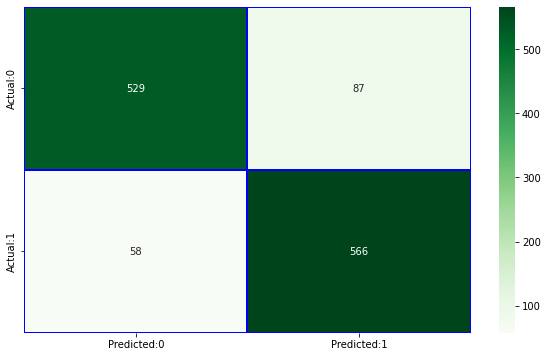

In [ ]:
# Train the Extra Trees Classifier on the training data
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf1.fit(train_x2, train_y2)

# Predict on the test data
y_pred1 = clf1.predict(test_x2)

from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
acc1 = accuracy_score(test_y2, y_pred1)
print('Accuracy:', acc1)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision1 = precision_score(test_y2, y_pred1)
recall1 = recall_score(test_y2, y_pred1)
f1_1 = f1_score(test_y2, y_pred1)

# Print the results
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_1)

conf_mat1 = confusion_matrix(test_y2, y_pred1)
print('Confusion Matrix: \n', conf_mat1)

#Plotting the confusion matrix
conf_matrix1 = pd.DataFrame(data = conf_mat1,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**2. Bagging classifier**

Accuracy: 0.7048387096774194
Precision: 0.6762295081967213
Recall: 0.7932692307692307
F1-score: 0.7300884955752213
Confusion Matrix: 
 [[379 237]
 [129 495]]


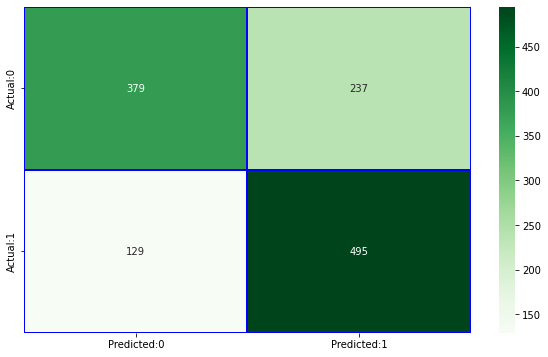

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=4)

# Define the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the Bagging Classifier to the training data
bagging_clf.fit(train_x2, train_y2)

# Predict the target on the test data
y_pred2 = bagging_clf.predict(test_x2)

# Calculate the accuracy, precision, recall, and F1-score
accuracy2 = accuracy_score(test_y2, y_pred2)
precision2 = precision_score(test_y2, y_pred2)
recall2 = recall_score(test_y2, y_pred2)
f1_2 = f1_score(test_y2, y_pred2)

# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_2)

conf_mat2 = confusion_matrix(test_y2, y_pred2)
print('Confusion Matrix: \n', conf_mat2)

#Plotting the confusion matrix
conf_matrix2 = pd.DataFrame(data = conf_mat2,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**3.CNN**

Epoch 1/10
124/124 [==============================] - 2s 5ms/step - loss: 0.6661 - accuracy: 0.6046 - val_loss: 0.6334 - val_accuracy: 0.6502
Epoch 2/10
124/124 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.6573 - val_loss: 0.6020 - val_accuracy: 0.6633
Epoch 3/10
124/124 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.6561 - val_loss: 0.6070 - val_accuracy: 0.6391
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6669 - val_loss: 0.5987 - val_accuracy: 0.6643
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6684 - val_loss: 0.6086 - val_accuracy: 0.6633
Epoch 6/10
124/124 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6614 - val_loss: 0.6009 - val_accuracy: 0.6643
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.6702 - val_loss: 0.6123 - val_accuracy: 0.6401
Epoch 

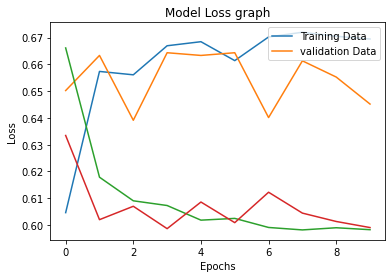

In [ ]:
model3 = keras.Sequential([
    #keras.layers.Flatten(input_shape =(13,)),
    keras.layers.Dense(60, activation = 'relu', input_shape= (5,)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid' )
])

#compiling the network

model3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

#training the neural network
history = model3.fit(train_x2, train_y2, validation_split=0.2, epochs = 10)

#Visualizing Accuracy and Losses
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

#model evaluation
loss, accuracy3 = model3.evaluate(test_x2, test_y2)
print(accuracy3)

from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for test set
y_pred3 = model3.predict(test_x2)
y_pred3 = np.argmax(y_pred3, axis=1)

# Calculate precision, recall, F1 score, and support
target_names = ['class 0', 'class 1']
print(classification_report(test_y2, y_pred3, target_names=target_names))

# Calculate confusion matrix
print(confusion_matrix(test_y2, y_pred3))


Training accuracy: 0.6611536910044373
Testing accuracy: 0.6782258064516129
Confusion Matrix: 
 [[415 201]
 [198 426]]
Accuracy:  0.6782258064516129
Precision: 0.6794258373205742
Recall: 0.6826923076923077
F1-score: 0.6810551558752997
Classification Report is:

               precision    recall  f1-score   support

           0       0.68      0.67      0.68       616
           1       0.68      0.68      0.68       624

    accuracy                           0.68      1240
   macro avg       0.68      0.68      0.68      1240
weighted avg       0.68      0.68      0.68      1240



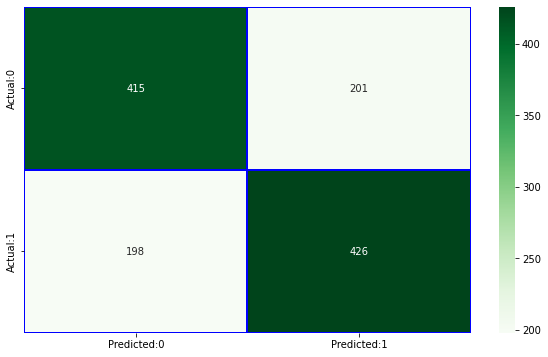

In [ ]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(train_x2, train_y2) #Training the data

from sklearn.metrics import accuracy_score
# Evaluate the model on the training set
train_preds4 = model4.predict(train_x2)
train_acc4 = accuracy_score(train_y2, train_preds4)

# Evaluate the model on the testing set
test_preds4 = model4.predict(test_x2)
test_acc4 = accuracy_score(test_y2, test_preds4)

# Print the training and testing accuracies
print("Training accuracy:", train_acc4)
print("Testing accuracy:", test_acc4)

# Make predictions on the testing data
y_pred4 = model4.predict(test_x2)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
conf_mat4 = confusion_matrix(test_y2, y_pred4)
acc4 = accuracy_score(test_y2, y_pred4)
print('Confusion Matrix: \n', conf_mat4)
print('Accuracy: ', acc4)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision4 = precision_score(test_y2, y_pred4)
recall4 = recall_score(test_y2, y_pred4)
f1_4 = f1_score(test_y2, y_pred4)

# Print the results
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f1_4)

from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report is:\n\n",classification_report(test_y2,y_pred4))  #classification report

#Plotting the confusion matrix
conf_matrix4 = pd.DataFrame(data = conf_mat4,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()


**5. Decision Tree**

In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x2,train_y2)
dt_predicted = dt.predict(test_x2)
dt_conf_matrix = confusion_matrix(test_y2, dt_predicted)
dt_acc_score = accuracy_score(test_y2, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y2,dt_predicted))

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision5 = precision_score(test_y2, dt_predicted)
recall5 = recall_score(test_y2, dt_predicted)
f1_5 = f1_score(test_y2, dt_predicted)

# Print the results
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f1_5)

confussion matrix
[[486 130]
 [131 493]]


Accuracy of DecisionTreeClassifier: 78.95161290322581 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       616
           1       0.79      0.79      0.79       624

    accuracy                           0.79      1240
   macro avg       0.79      0.79      0.79      1240
weighted avg       0.79      0.79      0.79      1240

Precision: 0.7913322632423756
Recall: 0.7900641025641025
F1-score: 0.7906976744186045


**6. GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
m6 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x2,train_y2)
gvc_predicted = gvc.predict(test_x2)
gvc_conf_matrix = confusion_matrix(test_y2, gvc_predicted)
gvc_acc_score = accuracy_score(test_y2, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y2,gvc_predicted))


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision6 = precision_score(test_y2, gvc_predicted)
recall6 = recall_score(test_y2, gvc_predicted)
f1_6 = f1_score(test_y2, gvc_predicted)

# Print the results
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f1_6)

confussion matrix
[[468 148]
 [133 491]]


Accuracy of Gradient Boosting Classifier: 77.33870967741936 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       616
           1       0.77      0.79      0.78       624

    accuracy                           0.77      1240
   macro avg       0.77      0.77      0.77      1240
weighted avg       0.77      0.77      0.77      1240

Precision: 0.7683881064162754
Recall: 0.7868589743589743
F1-score: 0.777513855898654


**7. XGBoost**

In [ ]:
import xgboost as xgb
# Create an XGBoost classifier
clf7 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Train the classifier
clf7.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred7 = clf7.predict(test_x2)

# Evaluate the performance of the classifier
accuracy7 = accuracy_score(test_y2, y_pred7)
print('Accuracy:', accuracy7)

cm7 = confusion_matrix(test_y2, y_pred7)
print('Confusion matrix:\n', cm7)

cr7 = classification_report(test_y2, y_pred7)
print('Classification report:\n', cr7)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision7 = precision_score(test_y2, y_pred7)
recall7 = recall_score(test_y2, y_pred7)
f1_7 = f1_score(test_y2, y_pred7)

# Print the results
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f1_7)

Accuracy: 0.8887096774193548
Confusion matrix:
 [[562  54]
 [ 84 540]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       616
           1       0.91      0.87      0.89       624

    accuracy                           0.89      1240
   macro avg       0.89      0.89      0.89      1240
weighted avg       0.89      0.89      0.89      1240

Precision: 0.9090909090909091
Recall: 0.8653846153846154
F1-score: 0.8866995073891625


**8. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier with 100 trees
clf8 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf8.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred8 = clf8.predict(test_x2)

# Evaluate the performance of the classifier
accuracy8 = accuracy_score(test_y2, y_pred8)
print('Accuracy:', accuracy8)

cm8 = confusion_matrix(test_y2, y_pred8)
print('Confusion matrix:\n', cm8)

cr8 = classification_report(test_y2, y_pred8)
print('Classification report:\n', cr8)


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision8 = precision_score(test_y2, y_pred8)
recall8 = recall_score(test_y2, y_pred8)
f1_8 = f1_score(test_y2, y_pred8)

# Print the results
print("Precision:", precision8)
print("Recall:", recall8)
print("F1-score:", f1_8)

Accuracy: 0.8653225806451613
Confusion matrix:
 [[529  87]
 [ 80 544]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       616
           1       0.86      0.87      0.87       624

    accuracy                           0.87      1240
   macro avg       0.87      0.87      0.87      1240
weighted avg       0.87      0.87      0.87      1240

Precision: 0.8621236133122029
Recall: 0.8717948717948718
F1-score: 0.8669322709163348
